According to NASA, since the beginning of the industrial era and the growth of the automobile industry, there has been 50% more CO2 present in the atmosphere.

There are different views to the effects of the rising levels of CO2. While it is often argued that this rising level has contributed to the increased global warming, scientists have argued that there aren’t enough tangible proofs to back this claim. On the other side, some scientists argue that this increase is not entirely a bad thing. For example, Florides and Christodoulides (2009) argued that the increased CO2 levels between 1981 and 2020 has contributed to increased global photosynthesis, thus improving the growth of plants.

These different views from different perspectives are not the focus of this analysis; however, they go on to show how the increased levels of CO2 emissions has garnered interests from different fields, and why carrying out investigation into the factors that affect CO2 levels is important. From this knowledge, appropriate bodies can go on to put in effective control measures or policies to effect necessary changes.

In this analysis, I carry out an extensive investigation into the correlation between different car features and CO2 emissions, in hopes of understanding what feature significantly influence varying levels of emission, and if possible, how much effect each one of them has compared to others.

The dataset contains the CO2 emission measure (measured in grams per kilometre) of 7385 recorded cars and the different features of these cars.

**This analysis will be carried out using R.**

# Pre-Analysis...

In [1]:
#Load necessary libraries

library(ggplot2)
library(stringr)
library(fastDummies)
library(MASS)
library(corrplot)
library(dplyr)

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Before going on to load the  CO2 Emissions dataset, I will load the dataset description, so it will aid the understanding of the discussions throughout the analysis.

In [2]:
df.des <- read.csv("/kaggle/input/co2-emission-by-vehicles/Data Description.csv")
df.des

Understanding.the.Data,X
<chr>,<chr>
Model,4WD/4X4 = Four-wheel drive
,AWD = All-wheel drive
,FFV = Flexible-fuel vehicle
,SWB = Short wheelbase
,LWB = Long wheelbase
,EWB = Extended wheelbase
Transmission,A = automatic
,AM = automated manual
,AS = automatic with select shift


**Then to the actual pre-processing...**

In [3]:
#Load Dataset

df <- read.csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")

head(df)
str(df)
dim(df)
any(is.na(df))

,Make,Model,Vehicle.Class,Engine.Size.L.,Cylinders,Transmission,Fuel.Type,Fuel.Consumption.City..L.100.km.,Fuel.Consumption.Hwy..L.100.km.,Fuel.Consumption.Comb..L.100.km.,Fuel.Consumption.Comb..mpg.,CO2.Emissions.g.km.
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
3,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
5,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
6,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


'data.frame':	7385 obs. of  12 variables:
 $ Make                            : chr  "ACURA" "ACURA" "ACURA" "ACURA" ...
 $ Model                           : chr  "ILX" "ILX" "ILX HYBRID" "MDX 4WD" ...
 $ Vehicle.Class                   : chr  "COMPACT" "COMPACT" "COMPACT" "SUV - SMALL" ...
 $ Engine.Size.L.                  : num  2 2.4 1.5 3.5 3.5 3.5 3.5 3.7 3.7 2.4 ...
 $ Cylinders                       : int  4 4 4 6 6 6 6 6 6 4 ...
 $ Transmission                    : chr  "AS5" "M6" "AV7" "AS6" ...
 $ Fuel.Type                       : chr  "Z" "Z" "Z" "Z" ...
 $ Fuel.Consumption.City..L.100.km.: num  9.9 11.2 6 12.7 12.1 11.9 11.8 12.8 13.4 10.6 ...
 $ Fuel.Consumption.Hwy..L.100.km. : num  6.7 7.7 5.8 9.1 8.7 7.7 8.1 9 9.5 7.5 ...
 $ Fuel.Consumption.Comb..L.100.km.: num  8.5 9.6 5.9 11.1 10.6 10 10.1 11.1 11.6 9.2 ...
 $ Fuel.Consumption.Comb..mpg.     : int  33 29 48 25 27 28 28 25 24 31 ...
 $ CO2.Emissions.g.km.             : int  196 221 136 255 244 230 232 255 267 212 ...


[1] 7385   12

[1] FALSE

We will remove the Model column; although present, the information does not perfectly represent the classes of models specified by the dataset, and there's no way or guideline to follow to fit the many models in their respective classes.

Also, we will remove the Make column. While we can already argue it is redundant within the scope of this analysis, one major reason to also remove it is how long the list is. It doesn't follow any order, too, signifying a nominal category. If we were to dummy encode it, we will end up with too many unnecessary variables at the end of the day.

Lastly, we will also remove Fuel Consumption Comb (mpg) since it is directly the same as Fuel Consumption Comb (L/100 km), only the units are different.

In [4]:
#Remove Make, Model, and Fuel Consumption Comb (mpg) Columns

df <- df %>%
  select(-Make, -Model, -Fuel.Consumption.Comb..mpg.)

Next, we extract Transmission Types from the Transmission column and make redundant the Number of Gears.

It would have been more interesting to separate these 2 attributes into different columns to further investigate their effects; however, most of the AV (continuously variable) transmission type do not have number of gears, such that if we separate these 2 attributes, many rows in the numbers of gears column will be null. We also can't fill NA values for this case, since many AV transmission type actually do not have classic gear variations. And if we decide to just remove the rows that have null values, then we will be losing quite a number of AV transmission type.

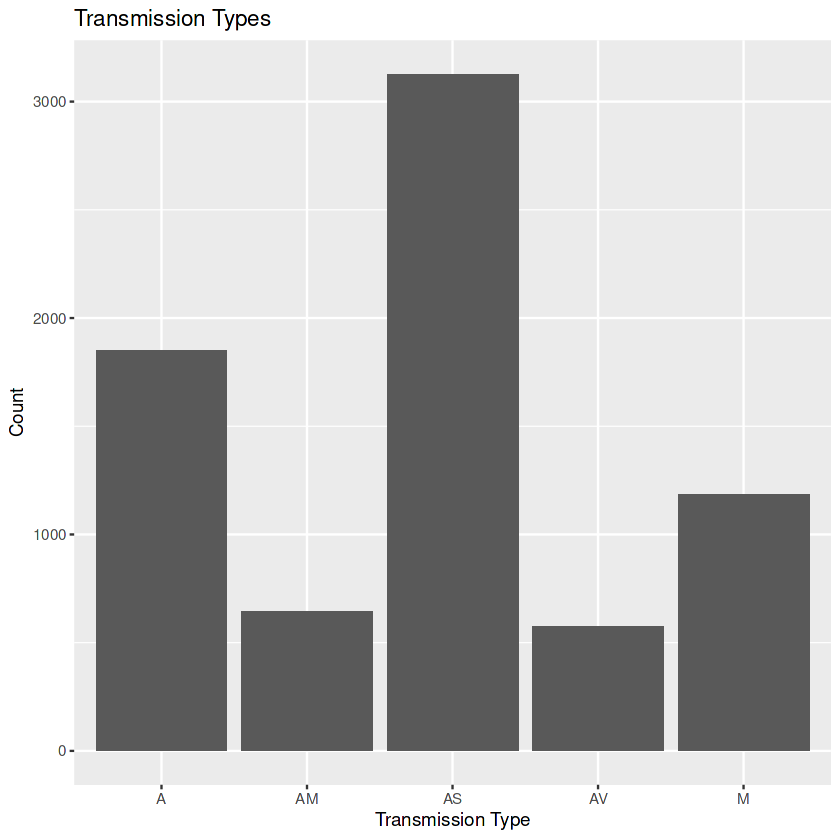

In [5]:
df <- df %>%
  mutate(
    Transmission.Type = str_match(Transmission, "([A-Za-z]+)")[, 2]
  ) %>%
  #Remove the original 'Transmission' column
  select(-Transmission)

#Bar chart of transmission types
ggplot(df, aes(x = Transmission.Type)) +
  geom_bar() +
  labs(title = "Transmission Types", x = "Transmission Type", y = "Count")

We will view the Box Plot of  Transmission Type, Vehicle Class, and Fuel Type against their CO2 emissions to see how the distribution of different classes in these variables relate to CO2 emissions. We will also plot the Scatter Plot of CO2 Emissions.

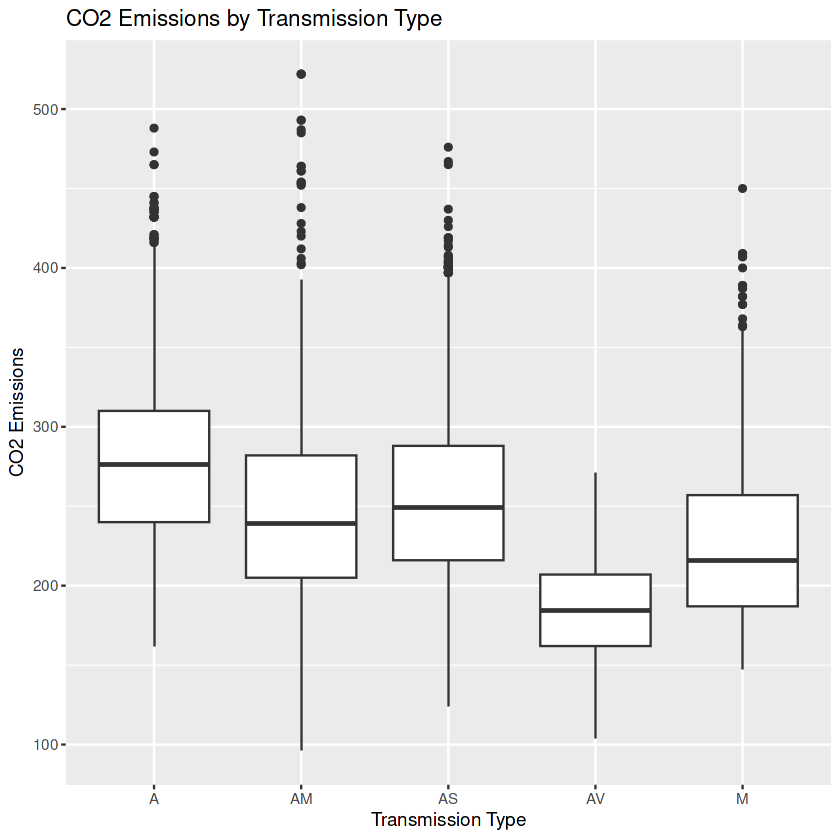

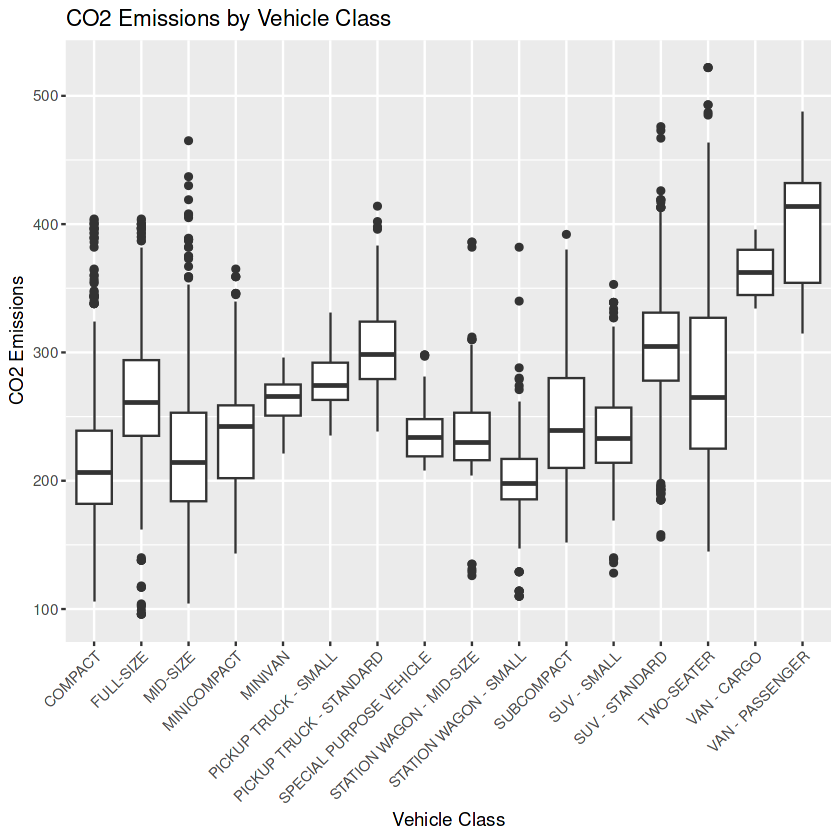

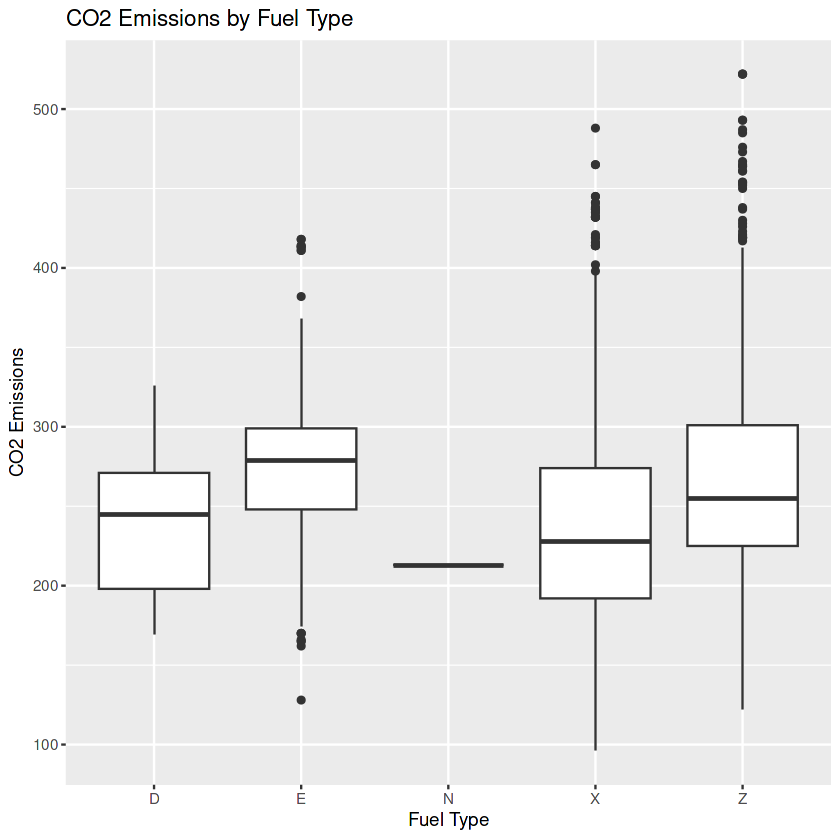

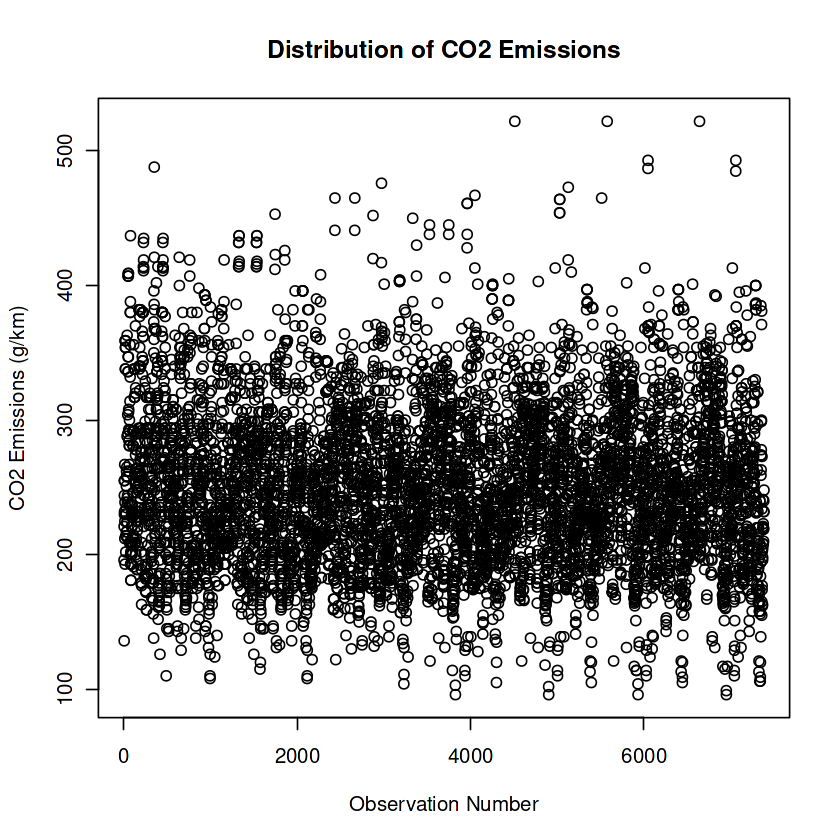

In [6]:
# Box plot for Transmission Type
ggplot(df, aes(x = as.factor(Transmission.Type), y = CO2.Emissions.g.km.)) +
  geom_boxplot() +
  labs(title = "CO2 Emissions by Transmission Type", x = "Transmission Type", y = "CO2 Emissions")

# Box plot for Vehicle Class
ggplot(df, aes(x = Vehicle.Class, y = CO2.Emissions.g.km.)) +
  geom_boxplot() +
  labs(title = "CO2 Emissions by Vehicle Class", x = "Vehicle Class", y = "CO2 Emissions") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Box plot for Fuel Type
ggplot(df, aes(x = as.factor(Fuel.Type), y = CO2.Emissions.g.km.)) +
  geom_boxplot() +
  labs(title = "CO2 Emissions by Fuel Type", x = "Fuel Type", y = "CO2 Emissions")

# Scatter Plot of CO2 Emissions
plot(df$CO2.Emissions.g.km., main = "Distribution of CO2 Emissions",
     xlab = "Observation Number", ylab = "CO2 Emissions (g/km)")

Next, we will code the vehicle class with specified numbers according to their sizes, in this order:
1. TWO-SEATER
2. MINICOMPACT
3. SUBCOMPACT
4. COMPACT
5. MID-SIZE
6. FULL-SIZE
7. STATION WAGON - SMALL
8. STATION WAGON - MID-SIZE
9. SUV - SMALL
10. SUV - STANDARD
11. MINIVAN
12. VAN - PASSENGER
13. VAN - CARGO
14. PICKUP TRUCK - SMALL
15. PICKUP TRUCK - STANDARD
16. SPECIAL PURPOSE VEHICLE

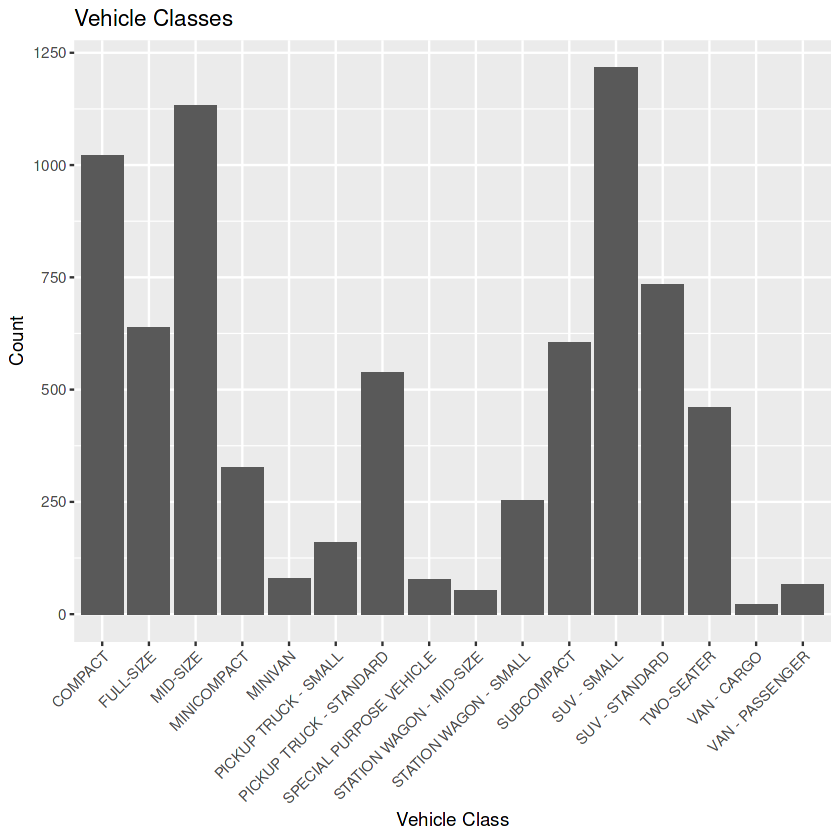

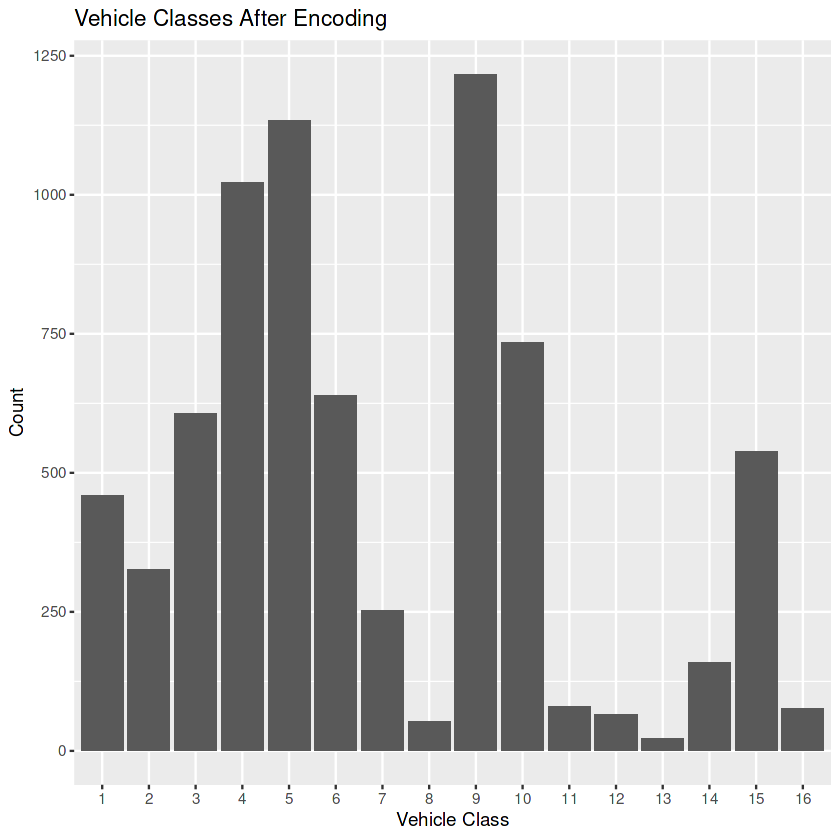

In [7]:
#Encoding the vehicle classes

#Plot bar graph of Vehicle Classes before Encoding
ggplot(df, aes(x = Vehicle.Class)) +
  geom_bar() +
  labs(title = "Vehicle Classes", x = "Vehicle Class", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

class_order <- c(
  "TWO-SEATER",
  "MINICOMPACT",
  "SUBCOMPACT",
  "COMPACT",
  "MID-SIZE",
  "FULL-SIZE",
  "STATION WAGON - SMALL",
  "STATION WAGON - MID-SIZE",
  "SUV - SMALL",
  "SUV - STANDARD",
  "MINIVAN",
  "VAN - PASSENGER",
  "VAN - CARGO",
  "PICKUP TRUCK - SMALL",
  "PICKUP TRUCK - STANDARD",
  "SPECIAL PURPOSE VEHICLE"
)

#Create a named vector with encoded numbers
class_encoding <- setNames(1:length(class_order), class_order)

#Add a new variable 'Vehicle.Class.Code' with the encoded numbers
df <- df %>%
  mutate(Vehicle.Class = class_encoding[Vehicle.Class])

#Convert Vehicle Class to a factor
df$Vehicle.Class <- factor(df$Vehicle.Class)

#Plot bar graph of Vehicle Classes
ggplot(df, aes(x = Vehicle.Class)) +
  geom_bar() +
  labs(title = "Vehicle Classes After Encoding", x = "Vehicle Class", y = "Count")

Next, we dummy encode variables Transmission Type and and Fuel Type. These two are not ordinal, hence the reason we use binary encoding.

In [8]:
#Dummy encode Fuel Type and Transmission Type

df <- dummy_cols(df, 
                 select_columns = c("Fuel.Type", "Transmission.Type"),
                 remove_selected_columns = TRUE)

In [9]:
#This is what our dataset looks like now

head(df)
str(df)

,Vehicle.Class,Engine.Size.L.,Cylinders,Fuel.Consumption.City..L.100.km.,Fuel.Consumption.Hwy..L.100.km.,Fuel.Consumption.Comb..L.100.km.,CO2.Emissions.g.km.,Fuel.Type_D,Fuel.Type_E,Fuel.Type_N,Fuel.Type_X,Fuel.Type_Z,Transmission.Type_A,Transmission.Type_AM,Transmission.Type_AS,Transmission.Type_AV,Transmission.Type_M
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,2.0,4,9.9,6.7,8.5,196,0,0,0,0,1,0,0,1,0,0
2,4,2.4,4,11.2,7.7,9.6,221,0,0,0,0,1,0,0,0,0,1
3,4,1.5,4,6.0,5.8,5.9,136,0,0,0,0,1,0,0,0,1,0
4,9,3.5,6,12.7,9.1,11.1,255,0,0,0,0,1,0,0,1,0,0
5,9,3.5,6,12.1,8.7,10.6,244,0,0,0,0,1,0,0,1,0,0
6,5,3.5,6,11.9,7.7,10.0,230,0,0,0,0,1,0,0,1,0,0


'data.frame':	7385 obs. of  17 variables:
 $ Vehicle.Class                   : Factor w/ 16 levels "1","2","3","4",..: 4 4 4 9 9 5 5 5 5 4 ...
 $ Engine.Size.L.                  : num  2 2.4 1.5 3.5 3.5 3.5 3.5 3.7 3.7 2.4 ...
 $ Cylinders                       : int  4 4 4 6 6 6 6 6 6 4 ...
 $ Fuel.Consumption.City..L.100.km.: num  9.9 11.2 6 12.7 12.1 11.9 11.8 12.8 13.4 10.6 ...
 $ Fuel.Consumption.Hwy..L.100.km. : num  6.7 7.7 5.8 9.1 8.7 7.7 8.1 9 9.5 7.5 ...
 $ Fuel.Consumption.Comb..L.100.km.: num  8.5 9.6 5.9 11.1 10.6 10 10.1 11.1 11.6 9.2 ...
 $ CO2.Emissions.g.km.             : int  196 221 136 255 244 230 232 255 267 212 ...
 $ Fuel.Type_D                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel.Type_E                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel.Type_N                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel.Type_X                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel.Type_Z                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Transmission.Type_A   

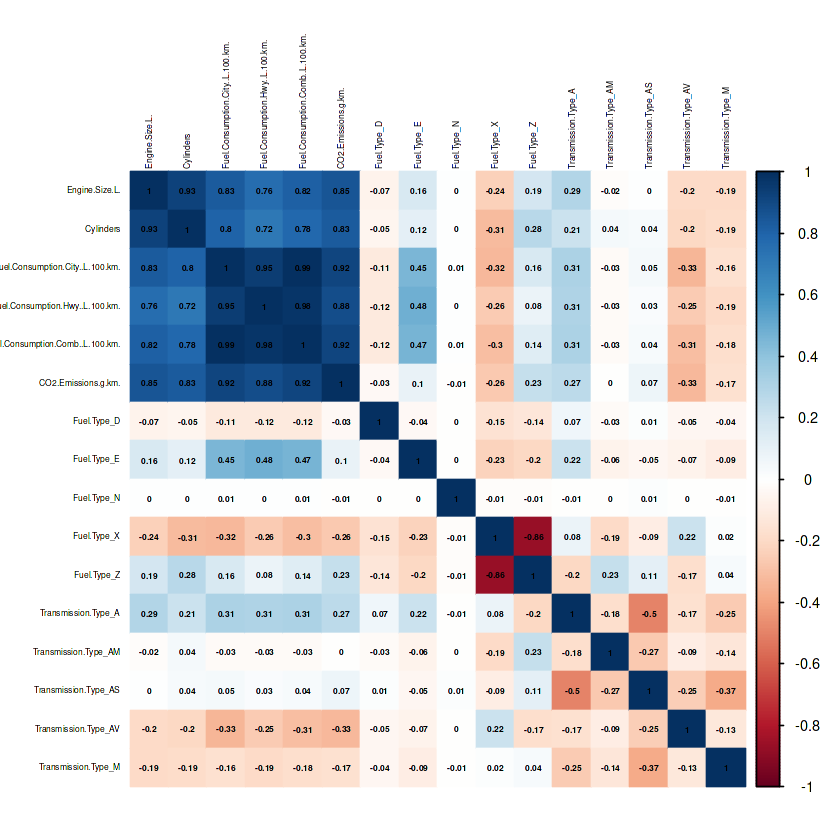

In [10]:
#Plotting a Correlation Plot

numeric_data <- df[, sapply(df, is.numeric)]
correlation_matrix <- cor(numeric_data)
corrplot(correlation_matrix, method = "color", addCoef.col = "black",
         number.cex = 0.4,
         tl.cex = 0.4, cl.cex = 0.7, tl.col = "black")

From above correlation plot, we can see that Fuel Consumptions across City, Highway, and the combination of both (55% city, 45% hwy) are all strongly positively correlated across each possible pair from the three.

Engine size, Number of cylinders, and Fuel consumption are all strongly positively correlated across each possible pair from the three, too.

CO2 Emissions is also strongly positively correlated to the three of Engine size, Fuel Consumption, and Number of cylinders.

We will also notice that there's a strong negative correlation among 2 of the encoded fuel type variables. This is likely caused by dummy variables trap. Before going forward, we will remove one dummy column from the 2 encoded variables that correlate the most with other members of the dummy variables (Fuel.Type_Z & Transmission.Type_A). This way, we hope to avoid the dummy variable trap.

While the rest of the correlations point towards a suspicion of multicollinearity, at this point, we will not be taking out these variables. We will go on to fit our model, test for multicollinearity using VIF, update our dataset and purge necessary variables.

In [11]:
#Remove Fuel Type Z & Transmission Type A Columns

df <- df %>%
  select(-Fuel.Type_Z, -Transmission.Type_A)

# Model Fitting...

In [12]:
#Fitting our multivariate linear regression model

model <- lm(CO2.Emissions.g.km. ~ ., data = df)

#Display the summary of the model
summary(model)


Call:
lm(formula = CO2.Emissions.g.km. ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.307  -2.470   0.221   1.898  43.958 

Coefficients:
                                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                         7.21618    0.55773   12.939  < 2e-16 ***
Vehicle.Class2                     -0.77286    0.37617   -2.055  0.03996 *  
Vehicle.Class3                     -0.31968    0.32269   -0.991  0.32188    
Vehicle.Class4                     -0.61692    0.30409   -2.029  0.04252 *  
Vehicle.Class5                     -0.38819    0.30619   -1.268  0.20491    
Vehicle.Class6                      0.98499    0.33040    2.981  0.00288 ** 
Vehicle.Class7                     -0.50832    0.42308   -1.201  0.22960    
Vehicle.Class8                      0.49400    0.75253    0.656  0.51155    
Vehicle.Class9                      1.12300    0.32577    3.447  0.00057 ***
Vehicle.Class10                     0.88798    0.36058    2.463  

In [13]:
#Initiating necessary packages to print VIF

packageurl <- "https://cran.r-project.org/src/contrib/Archive/pbkrtest/pbkrtest_0.4-4.tar.gz"
install.packages(packageurl, repos=NULL, type="source", method="curl")
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [14]:
#Calculate VIF of variables

vif.values <- vif(model)
print(vif.values)

                                        GVIF Df GVIF^(1/(2*Df))
Vehicle.Class                       7.250264 15        1.068264
Engine.Size.L.                      9.944679  1        3.153519
Cylinders                           9.317294  1        3.052424
Fuel.Consumption.City..L.100.km. 2087.221140  1       45.686115
Fuel.Consumption.Hwy..L.100.km.   580.417573  1       24.091857
Fuel.Consumption.Comb..L.100.km. 4663.309249  1       68.288427
Fuel.Type_D                         1.261904  1        1.123345
Fuel.Type_E                         1.945039  1        1.394646
Fuel.Type_N                         1.002118  1        1.001058
Fuel.Type_X                         1.785821  1        1.336346
Transmission.Type_AM                1.665948  1        1.290716
Transmission.Type_AS                1.882907  1        1.372191
Transmission.Type_AV                1.692301  1        1.300885
Transmission.Type_M                 1.857560  1        1.362923


The VIF value across the fuel consumption variables are incredibly high and signifies multicollinearity within our data. Therefore, to prevent this, we will remove the fuel consumption columns for city and highway, leaving the combined. We will refit our model, and check for the VIF values again.

In [15]:
#Remove the fuel consumption columns for city and highway

df.new <- df %>%
  select(-Fuel.Consumption.City..L.100.km., -Fuel.Consumption.Hwy..L.100.km.)

#Refit our model

model <- lm(CO2.Emissions.g.km. ~ ., data = df.new)
summary(model)


Call:
lm(formula = CO2.Emissions.g.km. ~ ., data = df.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.893  -2.552   0.196   1.941  44.237 

Coefficients:
                                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                         6.54442    0.53811   12.162  < 2e-16 ***
Vehicle.Class2                     -0.87563    0.37756   -2.319 0.020413 *  
Vehicle.Class3                     -0.22282    0.32430   -0.687 0.492061    
Vehicle.Class4                     -0.57279    0.30577   -1.873 0.061072 .  
Vehicle.Class5                     -0.28359    0.30749   -0.922 0.356416    
Vehicle.Class6                      1.06112    0.33167    3.199 0.001383 ** 
Vehicle.Class7                     -0.52197    0.42500   -1.228 0.219420    
Vehicle.Class8                      0.26282    0.75648    0.347 0.728282    
Vehicle.Class9                      0.89311    0.32200    2.774 0.005557 ** 
Vehicle.Class10                     0.40638    0.34580    1.1

In [16]:
#Calculate VIF of variables

vif.values <- vif(model)
print(vif.values)

                                     GVIF Df GVIF^(1/(2*Df))
Vehicle.Class                    4.758034 15        1.053370
Engine.Size.L.                   9.798736  1        3.130293
Cylinders                        9.283043  1        3.046809
Fuel.Consumption.Comb..L.100.km. 8.220131  1        2.867077
Fuel.Type_D                      1.234617  1        1.111133
Fuel.Type_E                      1.942414  1        1.393705
Fuel.Type_N                      1.001494  1        1.000747
Fuel.Type_X                      1.775136  1        1.332342
Transmission.Type_AM             1.599463  1        1.264699
Transmission.Type_AS             1.845216  1        1.358387
Transmission.Type_AV             1.528404  1        1.236286
Transmission.Type_M              1.842624  1        1.357433


The values of our VIFs have drastically reduced, which is good.

However, while we have VIFs < 10, there are still the ones considerably close to 10, which means they are almost signifying high multicollinearity.

Using our correlation plot from earlier as guide, we could notice Engine Size has the highest correlation with variables Number of Cylinders and Fuel Consumption. This could be where the high collinearity is still being introduced into our data. We will remove the Engine Size variable and try refitting our model again.

In [17]:
#Remove the Engine Size column

df.new <- df.new %>%
  select(-Engine.Size.L.)

#Refit our model

model <- lm(CO2.Emissions.g.km. ~ ., data = df.new)
summary(model)


Call:
lm(formula = CO2.Emissions.g.km. ~ ., data = df.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.890  -2.546   0.212   1.943  44.275 

Coefficients:
                                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                         6.39717    0.51300   12.470  < 2e-16 ***
Vehicle.Class2                     -0.87850    0.37754   -2.327 0.019999 *  
Vehicle.Class3                     -0.22249    0.32430   -0.686 0.492685    
Vehicle.Class4                     -0.57729    0.30573   -1.888 0.059028 .  
Vehicle.Class5                     -0.26425    0.30675   -0.861 0.389012    
Vehicle.Class6                      1.06479    0.33164    3.211 0.001330 ** 
Vehicle.Class7                     -0.54050    0.42450   -1.273 0.202969    
Vehicle.Class8                      0.26334    0.75647    0.348 0.727761    
Vehicle.Class9                      0.88648    0.32191    2.754 0.005906 ** 
Vehicle.Class10                     0.42135    0.34540    1.2

In [18]:
#Calculate VIF of variables

vif.values <- vif(model)
print(vif.values)

                                     GVIF Df GVIF^(1/(2*Df))
Vehicle.Class                    4.546218 15        1.051772
Cylinders                        4.487915  1        2.118470
Fuel.Consumption.Comb..L.100.km. 7.408801  1        2.721911
Fuel.Type_D                      1.234536  1        1.111097
Fuel.Type_E                      1.900892  1        1.378728
Fuel.Type_N                      1.001493  1        1.000746
Fuel.Type_X                      1.762838  1        1.327719
Transmission.Type_AM             1.573336  1        1.254327
Transmission.Type_AS             1.803792  1        1.343053
Transmission.Type_AV             1.528401  1        1.236285
Transmission.Type_M              1.827840  1        1.351976


From our new result, we can see we now have VIF values less than 10, signifying little to no multicollinerity.

Going further, we will test for other assumptions of Linear Regression model to confirm we have indeed fitted a good & valid regression model.

`geom_smooth()` using formula = 'y ~ x'


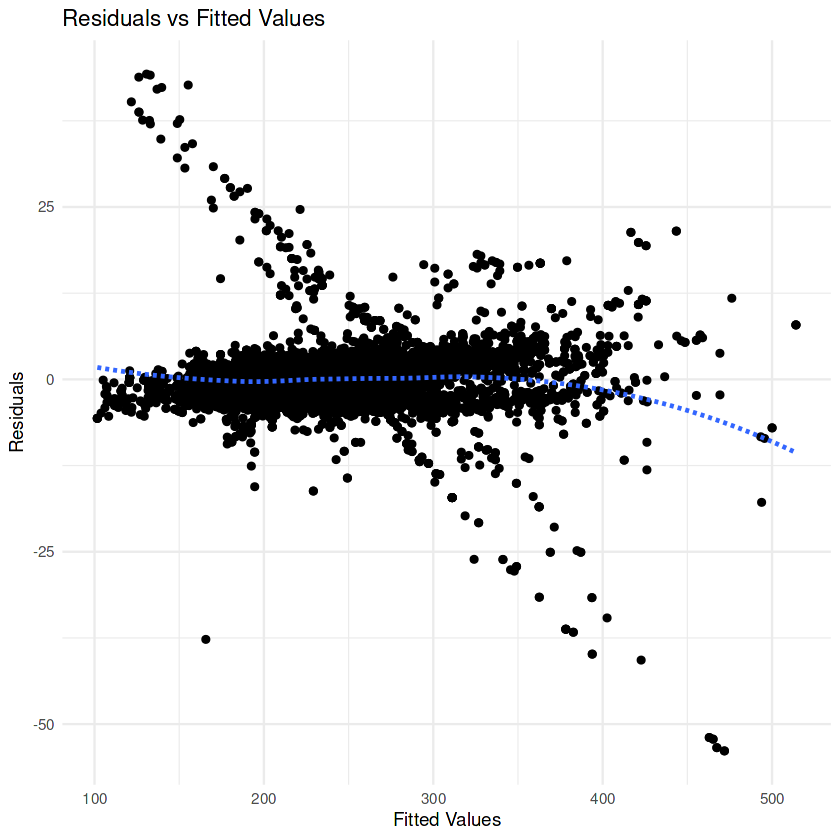

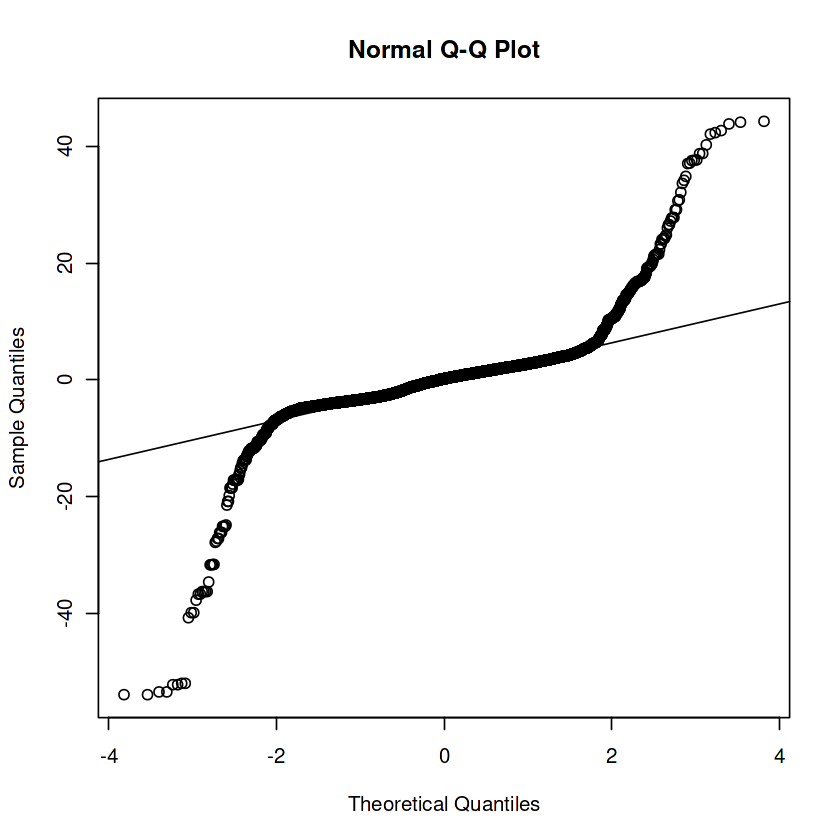

In [19]:
#Residuals Plot
ggplot(data = df.new, aes(x = fitted(model), y = resid(model))) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, linetype = "dashed") +
  labs(x = "Fitted Values", y = "Residuals") +
  ggtitle("Residuals vs Fitted Values") +
  theme_minimal()

#QQ Plot
qqnorm(model$residuals)
qqline(model$residuals)

The plots do not conform to the assumptions - the residual plots is not random and the qq plot is S-shaped.

One thing we will first do is to look back at the case of multicollinearity; even though we have solved for this earlier, the presence of collinearity might still be affecting our model.

One that clearly catches the eye is the Fuel consumption variable from our last VIF table. Looking back to our correlation plot from earlier, we can actually see that Cylinder and Combined Fuel Consumption variables have strong correlation. We will remove the Combined Fuel Consumption variable, fit our model, and test our assumptions again.

In [20]:
#Remove the Combined Fuel Consumption column

df.new <- df.new %>%
  select(-Fuel.Consumption.Comb..L.100.km.)

#Refit our model

model <- lm(CO2.Emissions.g.km. ~ ., data = df.new)
summary(model)


Call:
lm(formula = CO2.Emissions.g.km. ~ ., data = df.new)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.720  -15.125   -0.618   13.777  165.392 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          125.0933     1.9690  63.531  < 2e-16 ***
Vehicle.Class2       -17.2586     1.7740  -9.729  < 2e-16 ***
Vehicle.Class3        -6.2796     1.5313  -4.101 4.16e-05 ***
Vehicle.Class4       -12.9966     1.4376  -9.040  < 2e-16 ***
Vehicle.Class5        -9.9615     1.4454  -6.892 5.97e-12 ***
Vehicle.Class6        -2.9510     1.5670  -1.883   0.0597 .  
Vehicle.Class7        -3.9973     2.0063  -1.992   0.0464 *  
Vehicle.Class8        -1.6291     3.5759  -0.456   0.6487    
Vehicle.Class9        19.5974     1.5053  13.019  < 2e-16 ***
Vehicle.Class10       31.7445     1.5895  19.972  < 2e-16 ***
Vehicle.Class11       20.2090     3.0597   6.605 4.25e-11 ***
Vehicle.Class12      117.7498     3.3451  35.201  < 2e-16 ***
Vehicle.Class13

In [21]:
#Calculate VIF of variables

vif.values <- vif(model)
print(vif.values)

                         GVIF Df GVIF^(1/(2*Df))
Vehicle.Class        2.809321 15        1.035031
Cylinders            1.585673  1        1.259235
Fuel.Type_D          1.129144  1        1.062612
Fuel.Type_E          1.286219  1        1.134116
Fuel.Type_N          1.001100  1        1.000550
Fuel.Type_X          1.680115  1        1.296193
Transmission.Type_AM 1.573332  1        1.254325
Transmission.Type_AS 1.802678  1        1.342638
Transmission.Type_AV 1.428014  1        1.194995
Transmission.Type_M  1.821165  1        1.349506


`geom_smooth()` using formula = 'y ~ x'


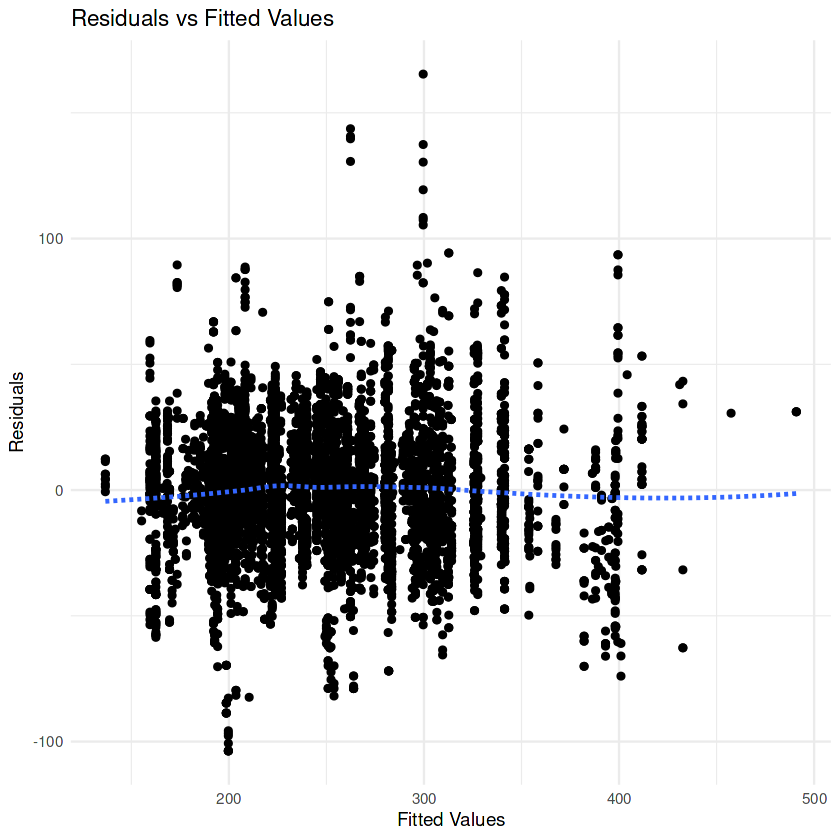

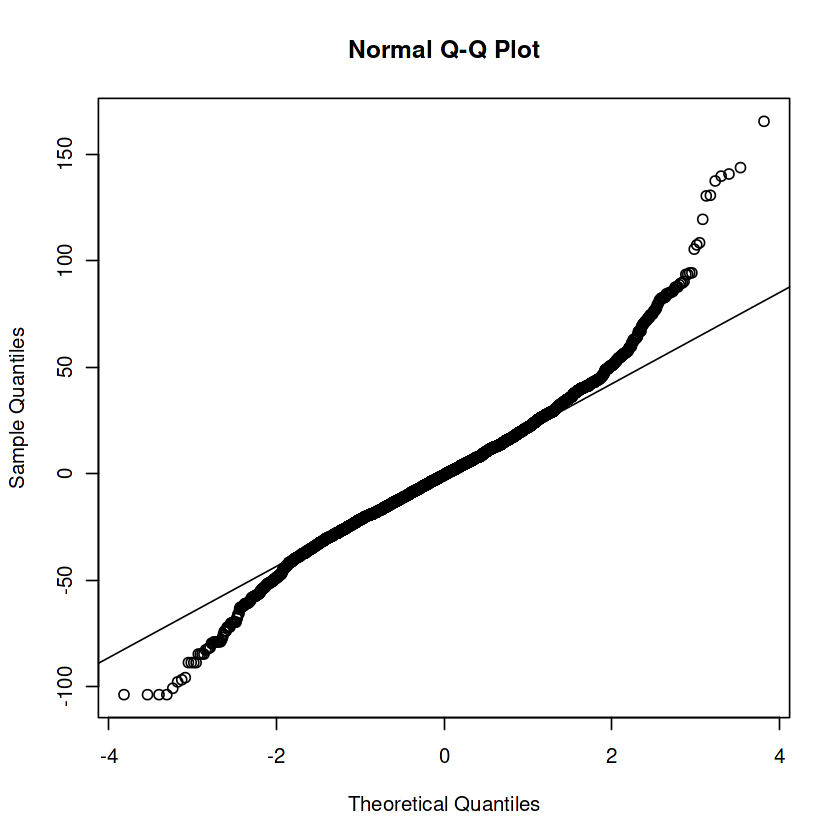

In [22]:
#Residuals Plot
ggplot(data = df.new, aes(x = fitted(model), y = resid(model))) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, linetype = "dashed") +
  labs(x = "Fitted Values", y = "Residuals") +
  ggtitle("Residuals vs Fitted Values") +
  theme_minimal()

#QQ Plot
qqnorm(model$residuals)
qqline(model$residuals)

While the residual plot looks more random now, the qq plot is still a bit S-shaped. This could be indicating that our dataset is non-linear as the residuals are likely not normality distributed. 

In a bid to investigate this linearity, we will check the normality of our model (response variable) using boxcox and try understand what kind of transformation we should perform, if there be need.

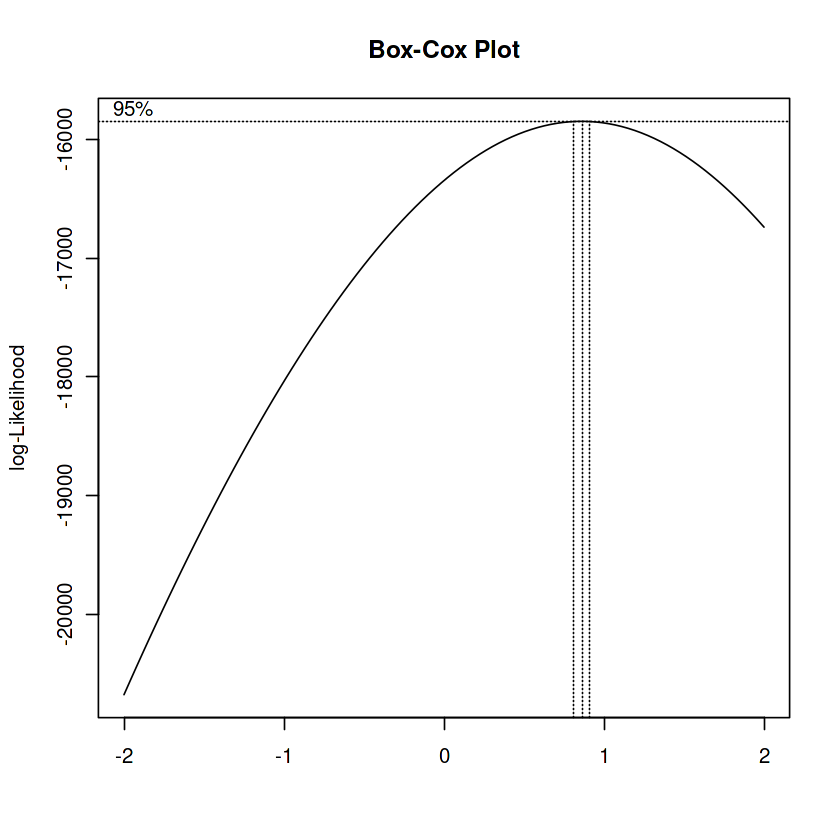

In [23]:
par(mfrow = c(1,1))
boxcox(model, plotit=TRUE)
title(main="Box-Cox Plot")

From the boxcox plot, although the lambda value is close to 1, the confidence interval does not include 1. Therefore, we will transform the response variable with the optimal lambda value.

[1] 0

numeric(0)

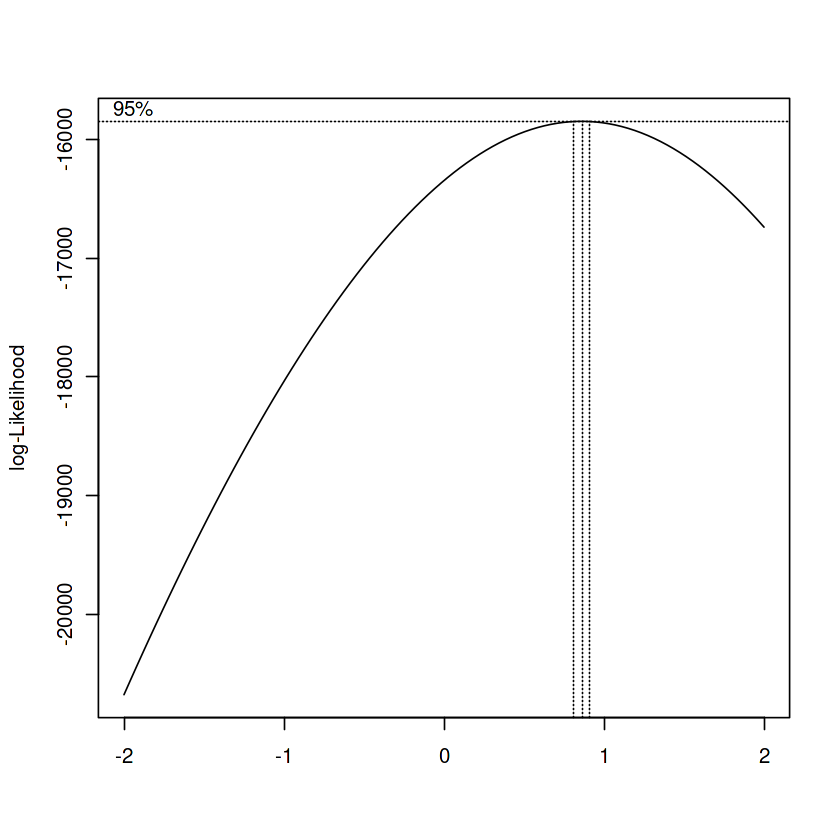

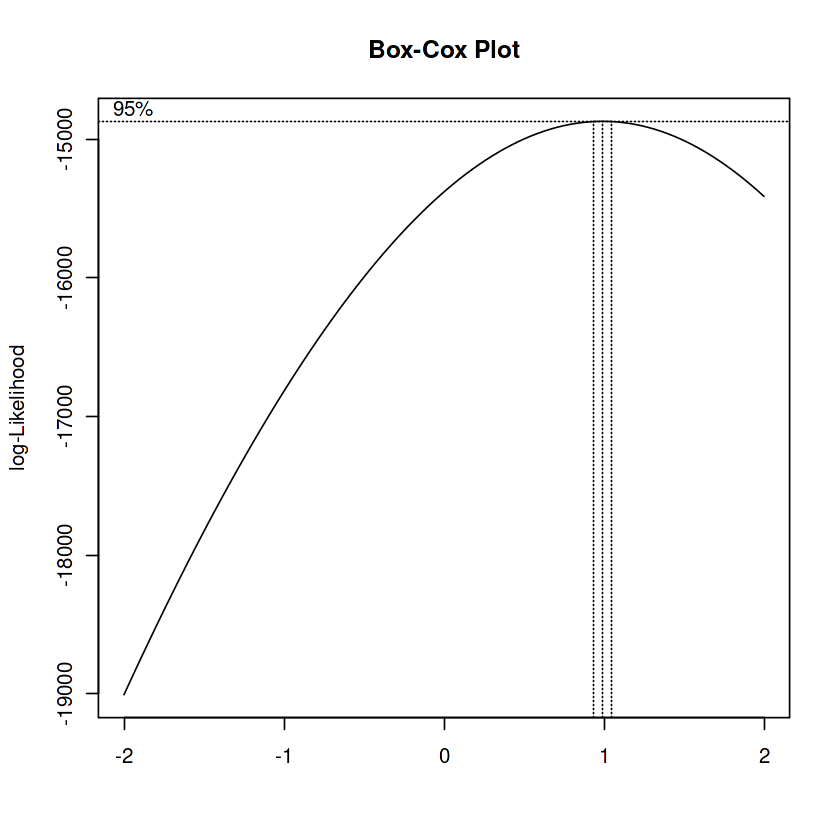

In [24]:
#Obtain optimal lambda
bc <- boxcox(model)
bc.power <- bc$x[which.max(bc$y)]

#Write function to perform transformations
BCTransform <- function(y, lambda=0) {
    if (lambda == 0L) { log(y) }
    else { (y^lambda - 1) / lambda }
    }

BCTransformInverse <- function(yt, lambda=0) {
    if (lambda == 0L) { exp(yt) }
    else { exp(log(1 + lambda * yt)/lambda) }
}

#Test functions
yt <- BCTransform(df.new$CO2.Emissions.g.km., 0)
yo <- BCTransformInverse(yt, 0)
unique(round(yo-df.new$CO2.Emissions.g.km.),8)

yt <- BCTransform(df.new$CO2.Emissions.g.km., .5)
yo <- BCTransformInverse(yt, .5)
unique(round(yo-df.new$CO2.Emissions.g.km.c),8)

#Perform transformation of the response variable with the optimal lambda
df.new$CO2.Emissions.g.km. <- BCTransform(df.new$CO2.Emissions.g.km., bc.power)

#Refit model
model <- lm(CO2.Emissions.g.km. ~ ., data = df.new)

#Replot Boxcox
par(mfrow = c(1,1))
boxcox(model, plotit=TRUE)
title(main="Box-Cox Plot")

From our new boxcox, we see that our new lambda value is 1, meaning our residuals seemingly now follow a normal distribution.

We can now plot the residuals plots and make inferences based on our model.


Call:
lm(formula = CO2.Emissions.g.km. ~ ., data = df.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.892  -7.283  -0.221   6.785  76.181 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           78.04397    0.95497  81.724  < 2e-16 ***
Vehicle.Class2        -8.00684    0.86039  -9.306  < 2e-16 ***
Vehicle.Class3        -2.79268    0.74269  -3.760 0.000171 ***
Vehicle.Class4        -6.25484    0.69725  -8.971  < 2e-16 ***
Vehicle.Class5        -4.74119    0.70104  -6.763 1.45e-11 ***
Vehicle.Class6        -1.14113    0.75999  -1.501 0.133270    
Vehicle.Class7        -1.84491    0.97305  -1.896 0.057997 .  
Vehicle.Class8        -0.48226    1.73432  -0.278 0.780968    
Vehicle.Class9         9.89444    0.73007  13.553  < 2e-16 ***
Vehicle.Class10       15.50272    0.77089  20.110  < 2e-16 ***
Vehicle.Class11       10.37170    1.48395   6.989 3.01e-12 ***
Vehicle.Class12       55.38218    1.62237  34.137  < 2e-16 ***
Vehicle.Clas

`geom_smooth()` using formula = 'y ~ x'


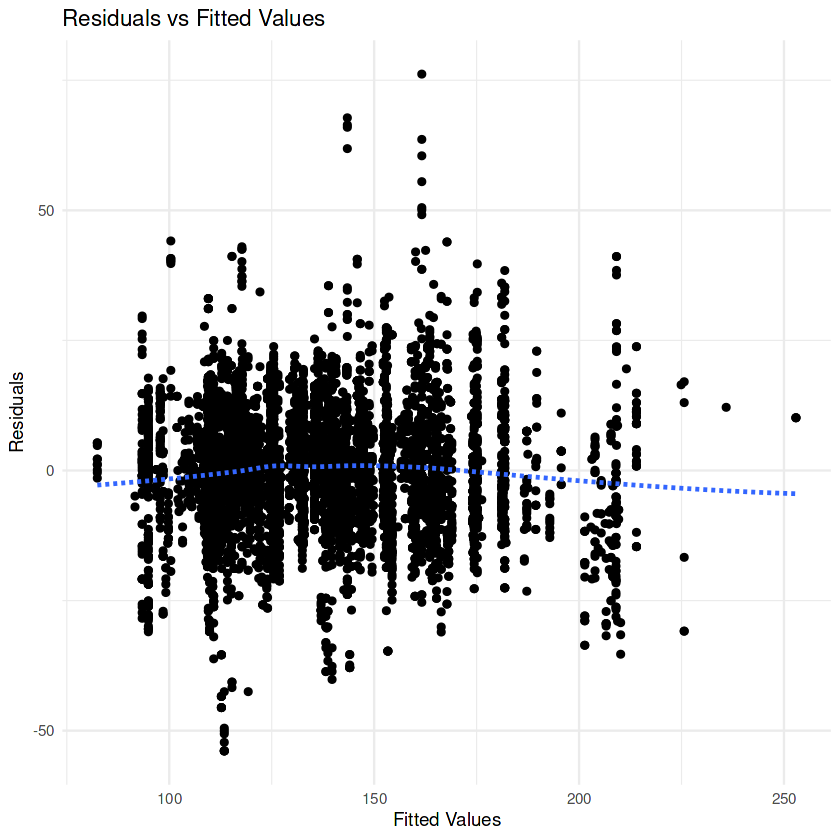

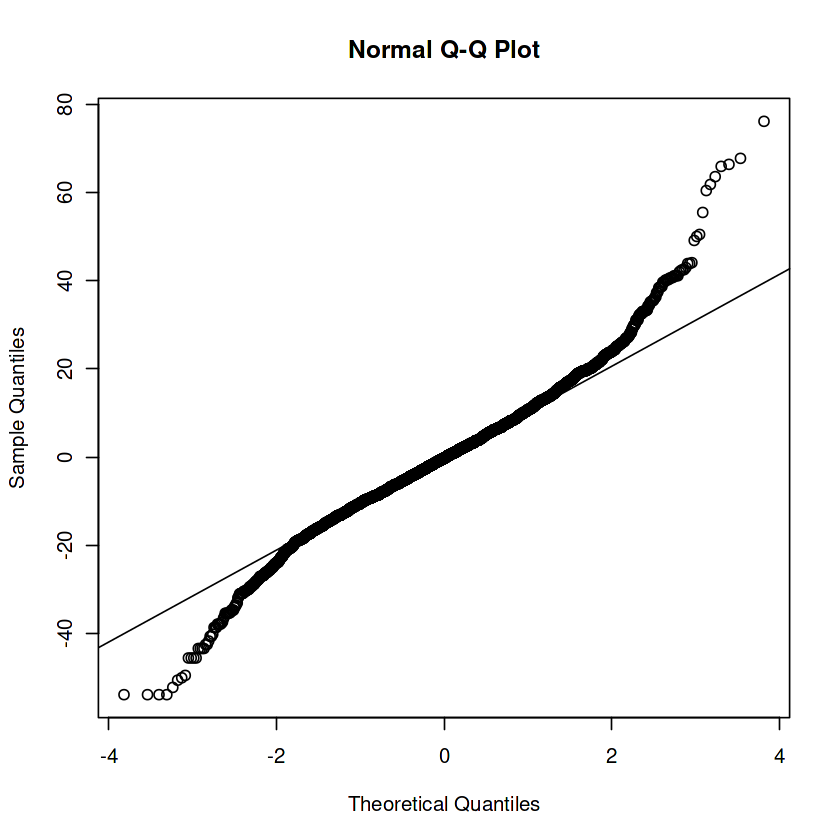

In [25]:
summary(model)

#Residuals Plot
ggplot(data = df.new, aes(x = fitted(model), y = resid(model))) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, linetype = "dashed") +
  labs(x = "Fitted Values", y = "Residuals") +
  ggtitle("Residuals vs Fitted Values") +
  theme_minimal()

#QQ Plot
qqnorm(model$residuals)
qqline(model$residuals)

# Discussion of Results

* All classes of vehicles, except Full Size (6), Small Station Wagon (7), and Mid-Size Station Wagon (8) are significant at 0.05. All fuel types are significant at 0.05, except Natural Gas. The Automated Manual transmission type is also not significant at 0.05. This means that there is no evidence at 0.05 p-value to suggest that these features have effect on the variability of CO2 emissions.

* Notably, compared to the reference Two-Seater vehicle class, Mini-compact cars emit the lowest amount of CO2, while Passenger Vans emit the most CO2 among the classes of vehicles. The claim that Passenger Vans emit the most CO2 can also be backed by the boxplot of vehicle classes against CO2 emissions plotted earlier in this analysis.

* Holding all other variables constant, we can see that increasing the number of cylinders in a car increases the CO2 emission levels.

* All the fuel types have negative estimates, meaning, compared to the reference premium gasoline fuel type, they influence lesser levels of CO2 emission, with Ethanol (E85) being the least.

* Lastly, among the different transmission types, we can notice that the AV transmission type significantly reduces levels of CO2 emission, as compared to Automatic transmission type which is the reference class. We can also back this with the boxplot of transmission types against CO2 emissions plotted earlier in this analysis. Manual transmission type slightly influences higher CO2 emission compared to Automatic transmissions.

# Conclusion
While we were able to establish meaningful insights from this analysis, there remains room for further recommendations. Future developments could benefit from performing even more in-depth investigation into already established facts. For example, since we were able to establish that AV transmission type reduces CO2 emissions compared to other transmission types, we can further look into different designs of AV transmission types, the timing of the variables, plus other factors, and how we can bring about even more redused emission from upgrading this transmission type, if possible.